In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import re
from unidecode import unidecode
import torch

In [5]:
dataset = pd.read_csv('dataset_tccV003.csv', index_col=0)

In [6]:
dataset.describe()

,nome_produto,categoria
count,18391,18391
unique,18391,320
top,Analéa Pé Nota 10 Creme Hidratante 150g (Kit C...,CONDIMENTO NATURAL
freq,1,200


In [7]:
dataset['categoria'].value_counts()

CONDIMENTO NATURAL             200
CAMA                           200
SHAMPOO                        200
UTENSÍLIOS DE INOX/ALUMÍNIO    200
UTENSÍLIOS DE VIDRO            200
                              ... 
GANCHO                          10
COLÔNIA INFANTIL                10
COLOMBA PASCAL                  10
AMIDO DE MILHO                  10
ESFIHA                           9
Name: categoria, Length: 320, dtype: int64

In [8]:
ds_train, ds_validacao = train_test_split(dataset, test_size = 0.20, random_state = 42, stratify=dataset['categoria'])

In [9]:
ds_validacao['categoria'].value_counts()

SORVETE                   40
ARTIGOS PARA FESTAS       40
CAMA                      40
SALGADINHO E APERITIVO    40
VINHO                     40
                          ..
BATEDEIRA                  2
MICROONDAS                 2
FRUTA DESIDRATADA          2
FILME PVC                  2
LEITE SABORIZADO           2
Name: categoria, Length: 320, dtype: int64

In [10]:
ds_train

,nome_produto,categoria
10208,LIMP PESADA MR MUSCULO CITRUS 500ML,LIMPEZA PESADA
9550,LAVA ROUPA PO ARIEL OXIAZUL 1KG,LAVA ROUPA PÓ
14573,SACO LIXO EMBALIXO ROLO C/2 AZ 50L C/20,SACOS
13492,BISNAGUINHA PANCO INTEGRAL 300G,PÃES
5571,CREME PENTEAR MONANGE 300G CACHOS PERFEITOS,CREME DE PENTEAR
...,...,...
9353,SANDUICHE 145g SEARA HOT HIT BACON GRIL,LANCHE PRONTO
12334,SACO ALVEJADO 40X65cm ALPLASTIPEL,PANOS/FLANELAS
3922,COLCHA CORTTEX SOLT BOUTIS 1.6X2.3 K/ROS,CAMA
9687,BETERRABA ESPECIAL kg BAND,LEGUMES


In [11]:
ds_validacao

,nome_produto,categoria
3455,CAFE GUIDALLI ALMOFADA PCT 500G,CAFÉ
5963,OLEO BANANA BEIRA ALTA 90ML,CREME/ÓLEO MÃO E PÉ
8928,IOGURTE JAMAVA 110G C/ POLPA MORANGO,IOGURTE
3318,CHALEIRA ELET CADENCE I SUPRE 127 CEL500,CAFETEIRA/CHALEIRA ELETRICA
14229,SAB BAR EMOZIONI IN TOSCANA CAMPAGNE DORATA250G,SABONETE BARRA
...,...,...
13242,PURIF AR AERO NO AR JARDIM/POMAR 360ML,PURIFICADOR DE AR
18166,VINHO NACIONAL LUIZ PORTO CHARD SEC BCO 750ML,VINHO
5702,CR TRAT WELLA PRO SERIES REPAIR 300ML,CREME PARA TRATAMENTO
9919,LENCO UMED CLIN OFF EX SV RF 400UND,LENÇO UMEDECIDO INFANTIL


In [12]:
class PreProcessing():
    def __init__(self, dataset):
        self.dataset = dataset
        
    def putCharBtw(self, x, letra, sep):
        rex = re.compile('[0-9]'+letra)
        if rex.search(x)==None:
            return x
        else:
            inicio = (rex.search(x).start())+1
            newString = x[:inicio]+sep+x[inicio:]
            return newString    
    

    def replaceWord(self, text, antiga, nova):
        text = [nova if t == antiga else t for t in text.split()]
        return ' '.join(text)

    
    def clean_text(self,text):
        """
            text: a string

            return: modified initial string
        """
        text = text.lower() # padroniza o texto para minusculo
        # text = unidecode(text) # retira acentuação do texto

        text = self.replaceWord(text,'d', ' ')  # substitui o "d" quando sozinho por espaço.
        text = self.replaceWord(text, 'n', ' ') # substitui o "n" quando sozinho por espaço.
        text = self.replaceWord(text,'c', ' ') # substitui o "c" quando sozinho por espaço.
        text = self.replaceWord(text, 'pcte', 'pct') # padroniza o pcte como pct
        text = self.replaceWord(text,'pt', 'pct') # padroniza o pt como pct
        text = text.replace(r'c/',' com ') # padroniza o "c/" para "com"
        text = text.replace(r"\.c/",' com ') # padroniza o ".c/" para "com"
        text = text.replace(r'-c/',' com ') # padroniza o "-c/" para "com"
        text = text.replace(' s/',' sem ') # padroniza o "s/" para "sem"
        text = text.replace(r'\.s/',' sem ') # padroniza o ".s/" para "sem"
        text = text.replace(r'-s/',' sem ') # padroniza o "-s/" para "sem"
        text = text.replace(' p/',' para ') # padroniza o "p/" para "para"
        text = text.replace(r'\.p/',' para ') # padroniza o ".p/" para "para"
        text = text.replace(r'-p/',' para ') # padroniza o "-p/" para "para"
        text = self.replaceWord(text,'unid', 'un') # padroniza o "unid" para "un"
        text = self.putCharBtw(text,'ml',' ')  #inclui um espaço entre a palavra e a unidade, para que a unidade tenha um token.
        text = self.putCharBtw(text,'kg',' ') #inclui um espaço entre a palavra e a unidade, para que a unidade tenha um token.
        text = self.putCharBtw(text,'g',' ') #inclui um espaço entre a palavra e a unidade, para que a unidade tenha um token.
        text = self.putCharBtw(text,'gr',' ') #inclui um espaço entre a palavra e a unidade, para que a unidade tenha um token.
        text = self.putCharBtw(text,'cm',' ') #inclui um espaço entre a palavra e a unidade, para que a unidade tenha um token.
        text = self.putCharBtw(text,'l',' ') #inclui um espaço entre a palavra e a unidade, para que a unidade tenha um token.
        text = self.putCharBtw(text,'mm',' ') #inclui um espaço entre a palavra e a unidade, para que a unidade tenha um token.
        text = self.putCharBtw(text,'mt',' ') #inclui um espaço entre a palavra e a unidade, para que a unidade tenha um token.
        text = self.putCharBtw(text,'un',' ') #inclui um espaço entre a palavra e a unidade, para que a unidade tenha um token.
        
        REPLACE_BY_SPACE_RE = re.compile('\[/(){}\[\]\|@,;.+-')
        text = REPLACE_BY_SPACE_RE.sub(' ', text) #substitui simbolos por expaço
        
        BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_-]')
        text = BAD_SYMBOLS_RE.sub('', text) # qualquer simbolo fora do alfabeto é retirado e substituido por nada.
       
        text = text.replace('  ',' ') #se tiver mais de um espaco em branco é substituido por somente 1 espaço em branco
        text = text.replace('  ',' ') #se tiver mais de um espaco em branco é substituido por somente 1 espaço em branco
        return text

    def processar(self):
        dataset_processed = self.dataset.copy()
        dataset_processed['nome_produto_processed'] = dataset_processed['nome_produto'].apply(self.clean_text).copy()
        return dataset_processed

In [13]:
preprocess = PreProcessing(ds_train)

In [14]:
dataset_processed = preprocess.processar()

In [15]:
dataset_processed

,nome_produto,categoria,nome_produto_processed
10208,LIMP PESADA MR MUSCULO CITRUS 500ML,LIMPEZA PESADA,limp pesada mr musculo citrus 500 ml
9550,LAVA ROUPA PO ARIEL OXIAZUL 1KG,LAVA ROUPA PÓ,lava roupa po ariel oxiazul 1 kg
14573,SACO LIXO EMBALIXO ROLO C/2 AZ 50L C/20,SACOS,saco lixo embalixo rolo com 2 az 50 l com 20
13492,BISNAGUINHA PANCO INTEGRAL 300G,PÃES,bisnaguinha panco integral 300 g
5571,CREME PENTEAR MONANGE 300G CACHOS PERFEITOS,CREME DE PENTEAR,creme pentear monange 300 g cachos perfeitos
...,...,...,...
9353,SANDUICHE 145g SEARA HOT HIT BACON GRIL,LANCHE PRONTO,sanduiche 145 g seara hot hit bacon gril
12334,SACO ALVEJADO 40X65cm ALPLASTIPEL,PANOS/FLANELAS,saco alvejado 40x65 cm alplastipel
3922,COLCHA CORTTEX SOLT BOUTIS 1.6X2.3 K/ROS,CAMA,colcha corttex solt boutis 16x23 kros
9687,BETERRABA ESPECIAL kg BAND,LEGUMES,beterraba especial kg band


In [16]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [17]:
# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: GeForce GTX 1660 Ti


In [18]:
from transformers import BertTokenizer

In [19]:
tokenizer = BertTokenizer.from_pretrained('neuralmind/bert-base-portuguese-cased', cls_token='[CLS]', 
                                          mask_token='[MASK]', 
                                          do_basic_tokenize=False,
                                          do_lower_case=False, 
                                          unk_token='[UNK]', strip_accents=True, clean_text=True)
print(dataset_processed['nome_produto_processed'].values[0])
print('Tokenized: ', tokenizer.tokenize(dataset_processed['nome_produto_processed'].values[0]))

limp pesada mr musculo citrus 500 ml
Tokenized:  ['lim', '##p', 'pesada', 'm', '##r', 'mus', '##culo', 'ci', '##trus', '500', 'm', '##l']


In [20]:
input_ids = []
for sentence in dataset_processed['nome_produto_processed']:
    encoded_sent = tokenizer.encode(sentence, add_special_tokens = True) #[CLS] - INICIO FRASE E [SEP] FINAL FRASE
    input_ids.append(encoded_sent)

In [21]:
print(tokenizer.tokenize(dataset_processed['nome_produto_processed'].values[0]))
print(input_ids[0])

['lim', '##p', 'pesada', 'm', '##r', 'mus', '##culo', 'ci', '##trus', '500', 'm', '##l']
[101, 1743, 22291, 13661, 174, 22282, 3270, 2177, 13747, 20446, 5047, 174, 22290, 102]


In [22]:
from keras.preprocessing.sequence import pad_sequences
print('Maior quantidade de palavras encotrada em uma frase: ', max([len(sen) for sen in input_ids]))

Maior quantidade de palavras encotrada em uma frase:  47


Using TensorFlow backend.


In [23]:
MAX_LEN = 52
input_pad = pad_sequences(input_ids, maxlen=MAX_LEN, dtype='long', value=0, truncating="post", padding='post')
input_pad[0]

array([  101,  1743, 22291, 13661,   174, 22282,  3270,  2177, 13747,
       20446,  5047,   174, 22290,   102,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0])

In [24]:
attention_masks = []
for sent in input_pad:
        att_mask  = [int(token_id > 0) for token_id in sent]
        attention_masks.append(att_mask)
print(attention_masks[0])        

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [25]:
#tratativa do label
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
labels = le.fit_transform(dataset_processed['categoria'])
dataset_processed['categoria_encoded'] = labels

In [26]:
dataset_processed[['categoria','categoria_encoded']]

,categoria,categoria_encoded
10208,LIMPEZA PESADA,179
9550,LAVA ROUPA PÓ,165
14573,SACOS,265
13492,PÃES,247
5571,CREME DE PENTEAR,85
...,...,...
9353,LANCHE PRONTO,161
12334,PANOS/FLANELAS,220
3922,CAMA,58
9687,LEGUMES,166


In [27]:
# Use train_test_split to split our data into train and validation sets for
# training
from sklearn.model_selection import train_test_split

# Use 90% for training and 10% for validation.
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_pad, dataset_processed['categoria_encoded'].values, 
                                                            random_state=2020, test_size=0.1)
# Do the same for the masks.
train_masks, validation_masks = train_test_split(attention_masks,
                                             random_state=2020, test_size=0.1)

In [28]:
train_inputs = torch.tensor(train_inputs)

train_labels = torch.tensor(train_labels)

train_masks = torch.tensor(train_masks)

validation_inputs = torch.tensor(validation_inputs)

validation_labels = torch.tensor(validation_labels)

validation_masks = torch.tensor(validation_masks)

print("train_size: ",train_inputs.size())
print("train_labels_size: ",train_labels.size())
print("train_masks_size: ",train_masks.size())
print("validation_size: ",validation_inputs.size())
print("validation_labels_size: ",validation_labels.size())
print("validation_masks_size: ",validation_masks.size())

train_size:  torch.Size([13240, 52])
train_labels_size:  torch.Size([13240])
train_masks_size:  torch.Size([13240, 52])
validation_size:  torch.Size([1472, 52])
validation_labels_size:  torch.Size([1472])
validation_masks_size:  torch.Size([1472, 52])


In [29]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
batch_size = 32
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [30]:
from transformers import BertForSequenceClassification, AdamW, BertConfig
model = BertForSequenceClassification.from_pretrained('neuralmind/bert-base-portuguese-cased', num_labels=320,
                                                      output_attentions = False,
                                                      output_hidden_states = False,
                                                     )
model.cuda()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(29794, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [31]:
params = list(model.named_parameters())

print('O modelo BERT tem {:} parâmetros diferentes.\n'.format(len(params)))

print('==== camada de Embedding ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Primeiro Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Camada de saída ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

O modelo BERT tem 201 parâmetros diferentes.

==== camada de Embedding ====

bert.embeddings.word_embeddings.weight                  (29794, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== Primeiro Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              

In [32]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

from transformers import get_linear_schedule_with_warmup

epochs = 4

total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, 
                                            num_training_steps = total_steps)

In [33]:
import numpy as np

# calculo da acurácia no decorrer do treinamento
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)


import time
import datetime

def format_time(elapsed):
    '''
    formatar o datetime hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [34]:
import random
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

predictions, true_labels = [], []

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids, b_input_mask, b_labels = batch
        
        b_input_ids = b_input_ids.type(torch.LongTensor)
        b_input_mask = b_input_mask.type(torch.LongTensor)
        b_labels = b_labels.type(torch.LongTensor)
        
        b_input_ids = b_input_ids.to(device)
        b_input_mask = b_input_mask.to(device)
        b_labels = b_labels.to(device)
        
        

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple.
        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))

    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        
        # Unpack the inputs from our dataloader        
        b_input_ids, b_input_mask, b_labels = batch
        
        b_input_ids = b_input_ids.type(torch.LongTensor)
        b_input_mask = b_input_mask.type(torch.LongTensor)
        b_labels = b_labels.type(torch.LongTensor)
        
        b_input_ids = b_input_ids.to(device)
        b_input_mask = b_input_mask.to(device)
        b_labels = b_labels.to(device)
        
        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have
            # not provided labels.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        predictions.append(logits)
        true_labels.append(label_ids)
        
        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        
        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1

    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 4 ========
Training...


C:\Users\MANAGER\AppData\Local\Programs\Python\Python38\lib\site-packages\transformers\optimization.py:155: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  ..\torch\csrc\utils\python_arg_parser.cpp:766.)
  exp_avg.mul_(beta1).add_(1.0 - beta1, grad)


  Batch    40  of    414.    Elapsed: 0:00:13.
  Batch    80  of    414.    Elapsed: 0:00:25.
  Batch   120  of    414.    Elapsed: 0:00:37.
  Batch   160  of    414.    Elapsed: 0:00:49.
  Batch   200  of    414.    Elapsed: 0:01:01.
  Batch   240  of    414.    Elapsed: 0:01:13.
  Batch   280  of    414.    Elapsed: 0:01:25.
  Batch   320  of    414.    Elapsed: 0:01:37.
  Batch   360  of    414.    Elapsed: 0:01:49.
  Batch   400  of    414.    Elapsed: 0:02:01.

  Average training loss: 5.01
  Training epcoh took: 0:02:05

Running Validation...
  Accuracy: 0.40
  Validation took: 0:00:04

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    414.    Elapsed: 0:00:12.
  Batch    80  of    414.    Elapsed: 0:00:24.
  Batch   120  of    414.    Elapsed: 0:00:36.
  Batch   160  of    414.    Elapsed: 0:00:48.
  Batch   200  of    414.    Elapsed: 0:01:02.
  Batch   240  of    414.    Elapsed: 0:01:14.
  Batch   280  of    414.    Elapsed: 0:01:26.
  Batch   320  of    414.    

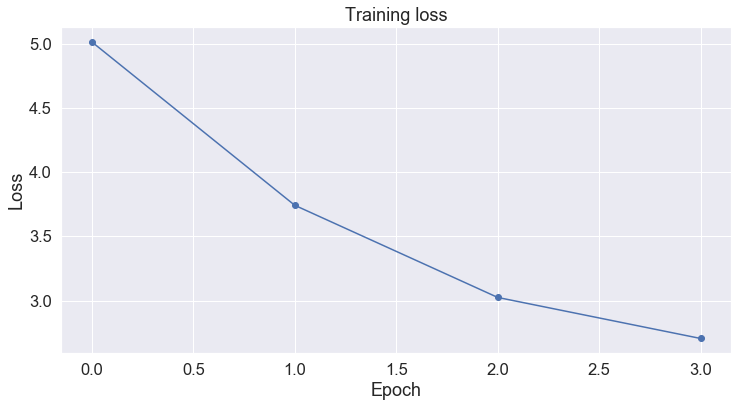

In [35]:
import matplotlib.pyplot as plt

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o')

# Label the plot.
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

# AVALIAÇÃO RESULTADOS COM DADOS DE TESTE

In [36]:
# PREPARACAO DADOS 
class PreparaTest():
    def __init__(self, ds_validacao):
        self.ds_validacao = ds_validacao
        
    def preparation(self):
        preprocess = PreProcessing(self.ds_validacao)
        dataset_validacao = preprocess.processar()
        input_ids = []
        for sentence in dataset_validacao['nome_produto_processed']:
            encoded_sent = tokenizer.encode(sentence, add_special_tokens = True) #[CLS] - INICIO FRASE E [SEP] FINAL FRASE
            input_ids.append(encoded_sent)
        MAX_LEN = 52
        input_pad = pad_sequences(input_ids, maxlen=MAX_LEN, dtype='long', value=0, truncating="post", padding='post')
        
        attention_masks = []
        for sent in input_pad:
                att_mask  = [int(token_id > 0) for token_id in sent]
                attention_masks.append(att_mask) 

        le = preprocessing.LabelEncoder()
        labels = le.fit_transform(dataset_validacao['categoria'])
        dataset_validacao['categoria_encoded'] = labels



        val_inputs = torch.tensor(input_pad)

        val_labels = torch.tensor(dataset_validacao['categoria_encoded'].values)

        val_masks = torch.tensor(attention_masks)
        
        batch_size = 32
        val_data = TensorDataset(val_inputs, val_masks, val_labels)
        val_sampler = SequentialSampler(val_data)
        val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)
        
        return val_dataloader
    
preparaTest = PreparaTest(ds_validacao)
test_dataloader = preparaTest.preparation()
print('tamanho_test', len(test_dataloader.dataset) )

tamanho_test 3679


In [37]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(test_dataloader.dataset)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in test_dataloader:
    
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)

    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch

    b_input_ids = b_input_ids.type(torch.LongTensor)
    b_input_mask = b_input_mask.type(torch.LongTensor)
    b_labels = b_labels.type(torch.LongTensor)

    b_input_ids = b_input_ids.to(device)
    b_input_mask = b_input_mask.to(device)
    b_labels = b_labels.to(device)

    # Telling the model not to compute or store gradients, saving memory and 
    # speeding up prediction
    with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

    logits = outputs[0]

    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    # Store predictions and true labels
    predictions.append(logits)
    true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 3,679 test sentences...
    DONE.


In [38]:
from sklearn.metrics import matthews_corrcoef

matthews_set = []
preds = []
# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')

# For each input batch...
for i in range(len(true_labels)):
  
    # The predictions for this batch are a 2-column ndarray (one column for "0" 
    # and one column for "1"). Pick the label with the highest value and turn this
    # in to a list of 0s and 1s.
    pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
    
    # Calculate and store the coef for this batch.  
    matthews = matthews_corrcoef(true_labels[i], pred_labels_i)                
    matthews_set.append(matthews)
    for sub_i in range(len(pred_labels_i)):
        preds.append(pred_labels_i[sub_i])

# Combine the predictions for each batch into a single list of 0s and 1s.
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = [item for sublist in true_labels for item in sublist]

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('MCC: %.3f' % mcc)

Calculating Matthews Corr. Coef. for each batch...
MCC: 0.621


In [39]:
ds_analise = ds_validacao.copy()
ds_analise['pred_encode'] = preds

In [40]:
ds_analise

,nome_produto,categoria,pred_encode
3455,CAFE GUIDALLI ALMOFADA PCT 500G,CAFÉ,54
5963,OLEO BANANA BEIRA ALTA 90ML,CREME/ÓLEO MÃO E PÉ,35
8928,IOGURTE JAMAVA 110G C/ POLPA MORANGO,IOGURTE,155
3318,CHALEIRA ELET CADENCE I SUPRE 127 CEL500,CAFETEIRA/CHALEIRA ELETRICA,296
14229,SAB BAR EMOZIONI IN TOSCANA CAMPAGNE DORATA250G,SABONETE BARRA,259
...,...,...,...
13242,PURIF AR AERO NO AR JARDIM/POMAR 360ML,PURIFICADOR DE AR,246
18166,VINHO NACIONAL LUIZ PORTO CHARD SEC BCO 750ML,VINHO,311
5702,CR TRAT WELLA PRO SERIES REPAIR 300ML,CREME PARA TRATAMENTO,86
9919,LENCO UMED CLIN OFF EX SV RF 400UND,LENÇO UMEDECIDO INFANTIL,265


In [41]:
def getCategoriaPred(dataset):
    le = preprocessing.LabelEncoder()
    encode = le.fit_transform(dataset['categoria'])
    dataset['categoria_pred'] = le.inverse_transform(ds_analise['pred_encode'])
    return dataset
ds_analise = getCategoriaPred(ds_analise)

In [42]:
ds_analise

,nome_produto,categoria,pred_encode,categoria_pred
3455,CAFE GUIDALLI ALMOFADA PCT 500G,CAFÉ,54,CAFÉ
5963,OLEO BANANA BEIRA ALTA 90ML,CREME/ÓLEO MÃO E PÉ,35,AZEITE
8928,IOGURTE JAMAVA 110G C/ POLPA MORANGO,IOGURTE,155,IOGURTE
3318,CHALEIRA ELET CADENCE I SUPRE 127 CEL500,CAFETEIRA/CHALEIRA ELETRICA,296,UTENSÍLIOS DE INOX/ALUMÍNIO
14229,SAB BAR EMOZIONI IN TOSCANA CAMPAGNE DORATA250G,SABONETE BARRA,259,SABONETE BARRA
...,...,...,...,...
13242,PURIF AR AERO NO AR JARDIM/POMAR 360ML,PURIFICADOR DE AR,246,PURIFICADOR DE AR
18166,VINHO NACIONAL LUIZ PORTO CHARD SEC BCO 750ML,VINHO,311,VINHO
5702,CR TRAT WELLA PRO SERIES REPAIR 300ML,CREME PARA TRATAMENTO,86,CREME PARA TRATAMENTO
9919,LENCO UMED CLIN OFF EX SV RF 400UND,LENÇO UMEDECIDO INFANTIL,265,SACOS


In [43]:
from sklearn.metrics import f1_score
f1_score(ds_analise['categoria'], ds_analise['categoria_pred'], average='micro')

0.6229953791791247

In [49]:
ds_analise.to_csv('modelo_bertV002.csv', index_label='index',sep=';')

In [48]:
help(ds_analise.to_csv)

Help on method to_csv in module pandas.core.generic:

to_csv(path_or_buf=None, sep=',', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, compression='infer', quoting=None, quotechar='"', line_terminator=None, chunksize=None, date_format=None, doublequote=True, escapechar=None, decimal='.') method of pandas.core.frame.DataFrame instance
    Write object to a comma-separated values (csv) file.
    
    .. versionchanged:: 0.24.0
        The order of arguments for Series was changed.
    
    Parameters
    ----------
    path_or_buf : str or file handle, default None
        File path or object, if None is provided the result is returned as
        a string.  If a file object is passed it should be opened with
        `newline=''`, disabling universal newlines.
    
        .. versionchanged:: 0.24.0
    
           Was previously named "path" for Series.
    
    sep : str, default ','
        String of length 1. Field delim

In [56]:
from sklearn.metrics import confusion_matrix, classification_report
classificacao = classification_report(ds_analise['categoria'], ds_analise['categoria_pred'],
                      output_dict=True)
classif1 = pd.DataFrame(classificacao).transpose()

C:\Users\MANAGER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
pd.options.display.max_rows = 999
classif1.sort_values(["support",'f1-score'], ascending= (False,True)).head(333)

,precision,recall,f1-score,support
macro avg,0.320050,0.323593,0.293031,3679.00000
weighted avg,0.513948,0.613210,0.521985,3679.00000
UTENSÍLIOS DE PLÁSTICO,0.362069,0.525000,0.428571,40.00000
UTENSÍLIOS DE VIDRO,0.375000,0.600000,0.461538,40.00000
UTENSÍLIOS DE INOX/ALUMÍNIO,0.379310,0.825000,0.519685,40.00000
ARTIGOS PARA FESTAS,0.593750,0.475000,0.527778,40.00000
CAMA,0.449438,1.000000,0.620155,40.00000
FARINÁCEO,0.474359,0.925000,0.627119,40.00000
SALGADINHO E APERITIVO,0.507246,0.875000,0.642202,40.00000
IOGURTE,0.500000,0.900000,0.642857,40.00000
